<a href="https://colab.research.google.com/github/arsxlanali/Bird-Classification/blob/main/BerntOilPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd                                   # pandas for datafram manipulation
import matplotlib.pyplot as plt                       # for visulization
import datetime as dt                                 # for date conversion
from sklearn.model_selection import train_test_split  # get tranning & testing data
from sklearn.linear_model import LinearRegression     # for model training

In [127]:
df = pd.read_excel("BrentOilPrices.xlsx",parse_dates =["Date"]) # load excel sheet and parse date column

In [128]:
df.head()                                             # print datafram

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


# Data Visualisation:

In [129]:
df['Year'] = pd.DatetimeIndex(df['Date']).year        # getting the year only from date colum 
df_visual = df[df.Year >= 2000]                       # deleting previous years from 2000

In [130]:
df_visual.head()

,Date,Price,Year
3200,2000-01-04,23.95,2000
3201,2000-01-05,23.72,2000
3202,2000-01-06,23.55,2000
3203,2000-01-07,23.35,2000
3204,2000-01-10,22.77,2000


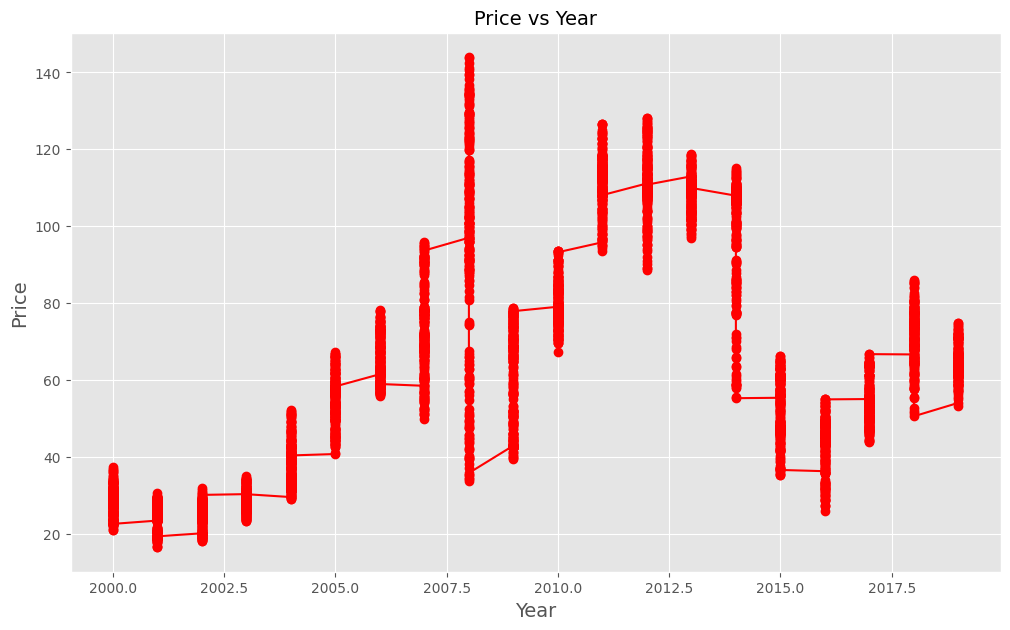

In [162]:
plt.figure(figsize=(12, 7))                               # Setting the canvvas size
plt.plot(df_visual['Year'], df_visual['Price'], color='red', marker='o') # ploting the data
plt.title('Price vs Year', fontsize=14)                   # stting the title for plot 
plt.xlabel('Year', fontsize=14)                           # setting label x
plt.ylabel('Price', fontsize=14)                          # setting label y
plt.grid(True)                                            # for grid view
plt.show()                                                # displaying the graph

# Build explanatory variables

In [132]:
df['MA3'] = df['Price'].rolling(3).mean()               # Moving Average for past 3 days
df['MA9'] = df['Price'].rolling(9).mean()               # Moving Average for past 9 days
df.head()                                               # displaying the dataset

,Date,Price,Year,MA3,MA9
0,1987-05-20,18.63,1987,NaN,NaN
1,1987-05-21,18.45,1987,NaN,NaN
2,1987-05-22,18.55,1987,18.543333,NaN
3,1987-05-25,18.60,1987,18.533333,NaN
4,1987-05-26,18.63,1987,18.593333,NaN


In [133]:
df['Date'] = df['Date'].map(dt.datetime.toordinal)       # Coverting to oridinal data for model tranning
df.head()                                                # displaying the dataset

,Date,Price,Year,MA3,MA9
0,725511,18.63,1987,NaN,NaN
1,725512,18.45,1987,NaN,NaN
2,725513,18.55,1987,18.543333,NaN
3,725516,18.60,1987,18.533333,NaN
4,725517,18.63,1987,18.593333,NaN


In [134]:
df = df.dropna(axis=0)                                   # droping the rows where the NaN values exist
df.head()

,Date,Price,Year,MA3,MA9
8,725523,18.65,1987,18.610000,18.587778
9,725524,18.68,1987,18.636667,18.593333
10,725525,18.75,1987,18.693333,18.626667
11,725526,18.78,1987,18.736667,18.652222
12,725527,18.65,1987,18.726667,18.657778


# Define the Train and Test Data

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df[['MA3','MA9']], df['Date'], test_size=0.2) # splitting traning & testing data 80/20

## Build a Linear Regression Model 

In [136]:
model = LinearRegression()                                                # Initilizing the Linear model
model.fit(X_train, y_train)                                               # fitting the traning data 

LinearRegression()

# Prediction Function and Result

Text(0.55, 0.15, '$y = 81.51 x_2 +-3.89 x_1 + 727823.91 $')

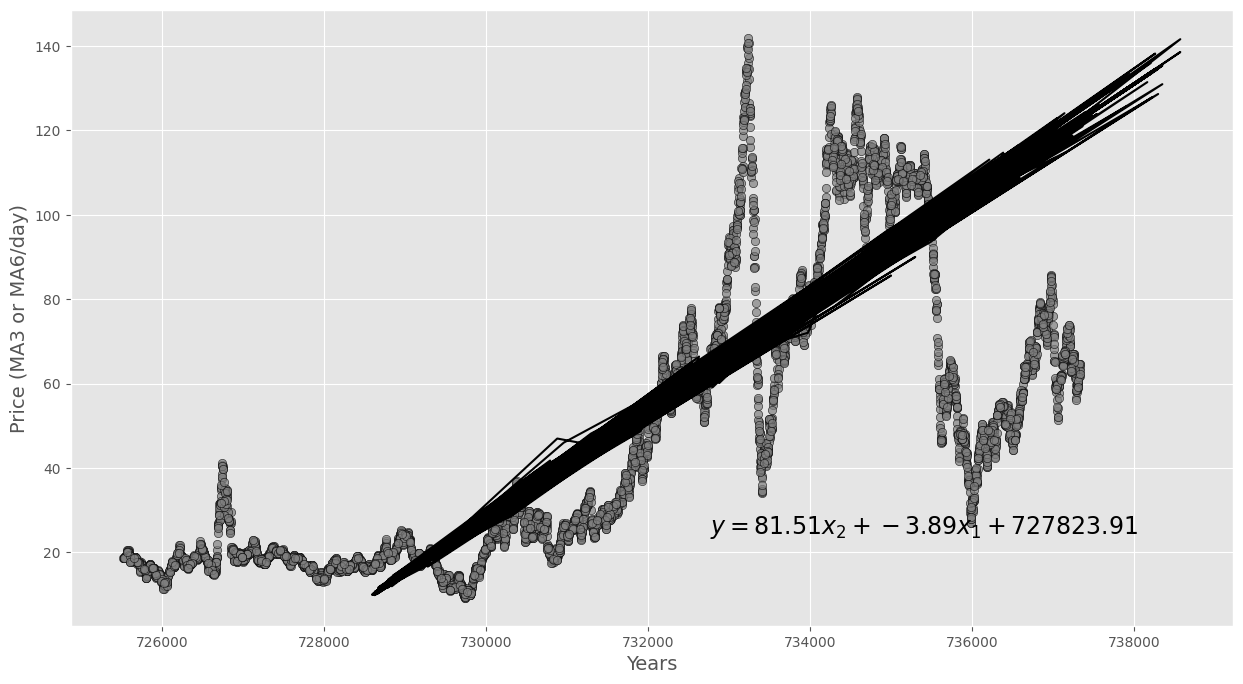

In [207]:
plt.style.use('ggplot')                           # setting the graph style
fig, ax = plt.subplots(figsize=(15, 8))           # setting the figure size
ax.plot(model.coef_[1]*X_test['MA9']+model.coef_[0]*X_test['MA3']+model.intercept_ ,X_test,color='k', label='Regression model') # Regression line
ax.scatter( y_train,X_train['MA3'], edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')  # Plotting train data
ax.set_ylabel('Price (MA3 or MA6/day)', fontsize=14)   # Setting y label
ax.set_xlabel('Years', fontsize=14)                    # setting x label
ax.text(0.55, 0.15, '$y = %.2f x_2 +%.2f x_1 + %.2f $' % (model.coef_[1],model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)
# adding the alpha, beta & theta in graph

Text(0.55, 0.15, '$y = 81.51 x_2 +-3.89 x_1 - 727823.91 $')

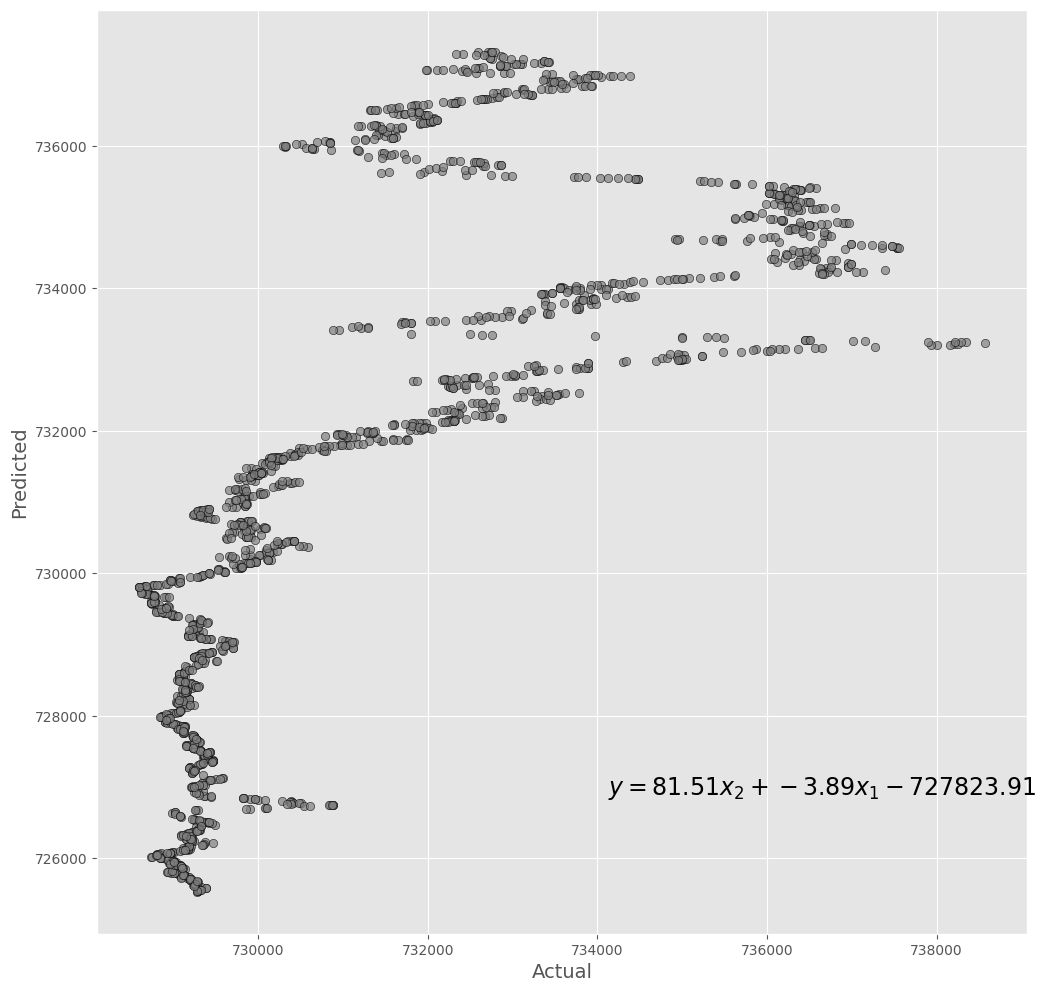

In [209]:
plt.style.use('ggplot')                                  # setting the graph style
fig, ax = plt.subplots(figsize=(12, 12))                 # setting the figure size
ax.scatter( model.predict(X_test), y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data') # Plot for predicted vs actual
ax.set_ylabel('Predicted', fontsize=14)                  # setting label y
ax.set_xlabel('Actual', fontsize=14)                     # setting label x
ax.text(0.55, 0.15, '$y = %.2f x_2 +%.2f x_1 - %.2f $' % (model.coef_[1],model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)
# adding the alpha, beta & theta in graph

In [196]:
r_sq = model.score(X_test, y_test)                      # calculation the root mean squred values
print("RMS = {}".format(r_sq))                          # printing RMS

RMS = 0.5594929361502641


# Calculate the alpha and betas value

In [200]:
print(" Y = alpha*x_2 + beta*x_1 + theta")                    # printing equation
print(" Y = {:.2f}*x_2 + {:.2f}*x_1 + {:.2f}".format(model.coef_[1],model.coef_[0] ,model.intercept_)) # printing equation with variables

 Y = alpha*x_2 + beta*x_1 + theta
 Y = 81.51*x_2 + -3.89*x_1 + 727823.91
